In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_directory = "/content/drive/MyDrive/Dataset/Rubber_Leaf/"

In [ ]:
ls "/content/drive/MyDrive/Dataset/Rubber_Leaf/"

car.jpg  car.png  Colletotrichum/  Corynespora/  Oidium/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # split the dataset into training and validation sets
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Load the images and their labels from the subdirectories
dataset_path = '/content/drive/MyDrive/Dataset/Rubber_Leaf/'
image_size = (224, 224)  # set the size of the input images
batch_size = 32  # set the batch size for training
train_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # use the 'training' subset for training
)
validation_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # use the 'validation' subset for validation
)
test_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle the data for accurate predictions
)


Found 616 images belonging to 3 classes.
Found 154 images belonging to 3 classes.
Found 770 images belonging to 3 classes.


In [ ]:
import os
class_names = os.listdir(dataset_path)
print(class_names)

['Colletotrichum', 'Corynespora', 'Oidium', 'car.png', 'car.jpg']


In [ ]:
from collections import Counter

counter = Counter(train_generator.classes)

print(counter.items())

dict_items([(0, 200), (1, 200), (2, 216)])


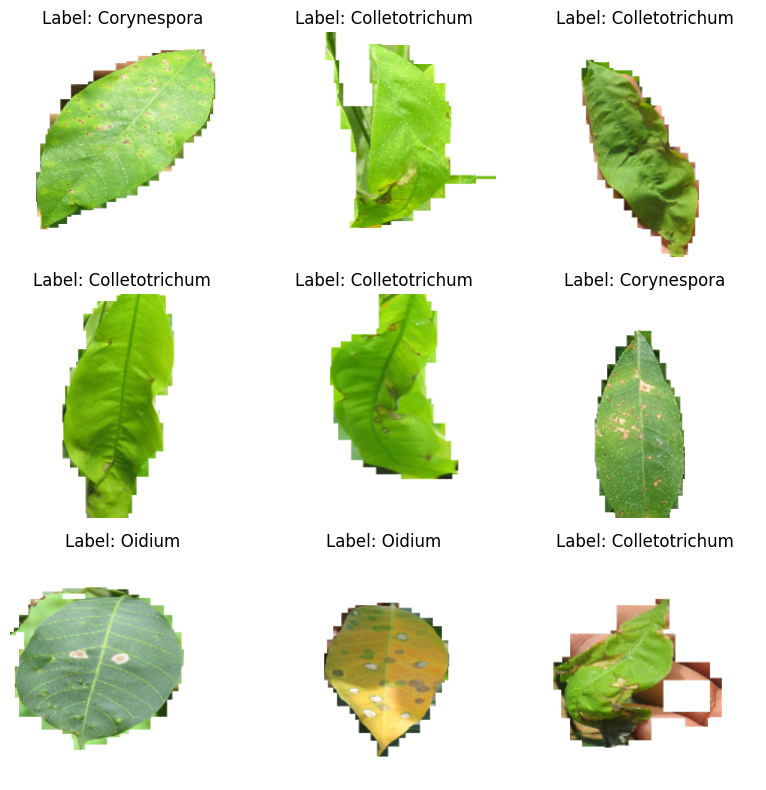

In [ ]:
class_names = train_generator.class_indices
class_names = dict((v, k) for k, v in class_names.items())  # Swap keys and values in the dictionary

# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axs = axs.flatten()

for i in range(9):
    img = images[i]
    label = class_names[np.argmax(labels[i])]  # Get the class name using the updated class_names dictionary
    axs[i].imshow(img)
    axs[i].set_title(f"Label: {label}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
model.add(Flatten())

# Add fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for leaf identification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30  # Number of training epochs
)

Epoch 1/30
20/20 [==============================] - 845s 42s/step - loss: 1.2408 - accuracy: 0.5357 - val_loss: 0.8472 - val_accuracy: 0.6299
Epoch 2/30
20/20 [==============================] - 517s 26s/step - loss: 0.5732 - accuracy: 0.7419 - val_loss: 0.6049 - val_accuracy: 0.6883
Epoch 3/30
20/20 [==============================] - 491s 25s/step - loss: 0.3766 - accuracy: 0.8490 - val_loss: 0.5660 - val_accuracy: 0.8117
Epoch 4/30
20/20 [==============================] - 506s 26s/step - loss: 0.3966 - accuracy: 0.8425 - val_loss: 0.6793 - val_accuracy: 0.7468
Epoch 5/30
20/20 [==============================] - 537s 27s/step - loss: 0.3058 - accuracy: 0.8847 - val_loss: 0.6706 - val_accuracy: 0.7857
Epoch 6/30
20/20 [==============================] - 504s 25s/step - loss: 0.3853 - accuracy: 0.8523 - val_loss: 0.7554 - val_accuracy: 0.6948
Epoch 7/30
20/20 [==============================] - 510s 26s/step - loss: 0.3499 - accuracy: 0.8506 - val_loss: 0.5156 - val_accuracy: 0.7792
Epoch 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

25/25 [==============================] - 492s 20s/step - loss: 0.1396 - accuracy: 0.9545
Test Loss: 0.13962361216545105
Test Accuracy: 0.9545454382896423


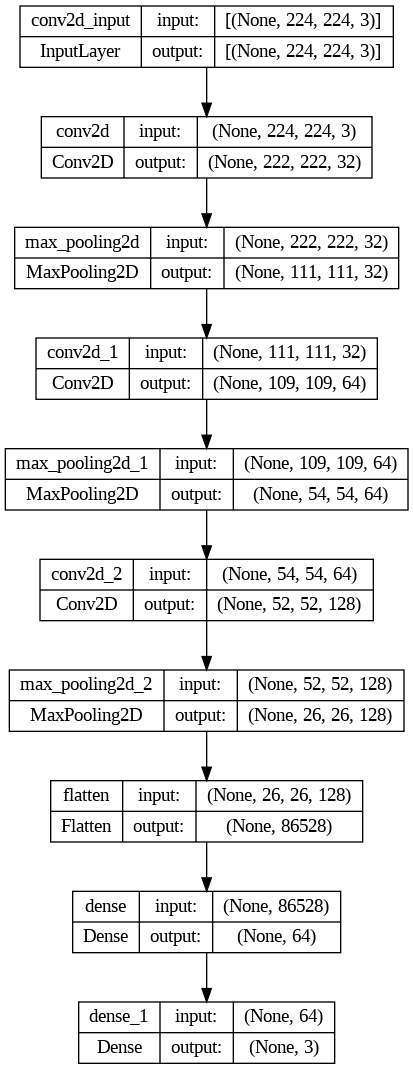

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)


In [ ]:
from sklearn.metrics import classification_report

# Get the predictions for the test data
predictions = model.predict(test_generator)

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual class indices
actual_classes = test_generator.classes

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
print(classification_report(actual_classes, predicted_classes, target_names=class_labels))

25/25 [==============================] - 521s 21s/step
                precision    recall  f1-score   support

Colletotrichum       0.94      0.98      0.96       250
   Corynespora       0.94      0.90      0.92       250
        Oidium       0.97      0.97      0.97       270

      accuracy                           0.95       770
     macro avg       0.95      0.95      0.95       770
  weighted avg       0.95      0.95      0.95       770



In [ ]:
model.save('/content/drive/MyDrive/Dataset/Rubber_leaf_diseases_final.h5')

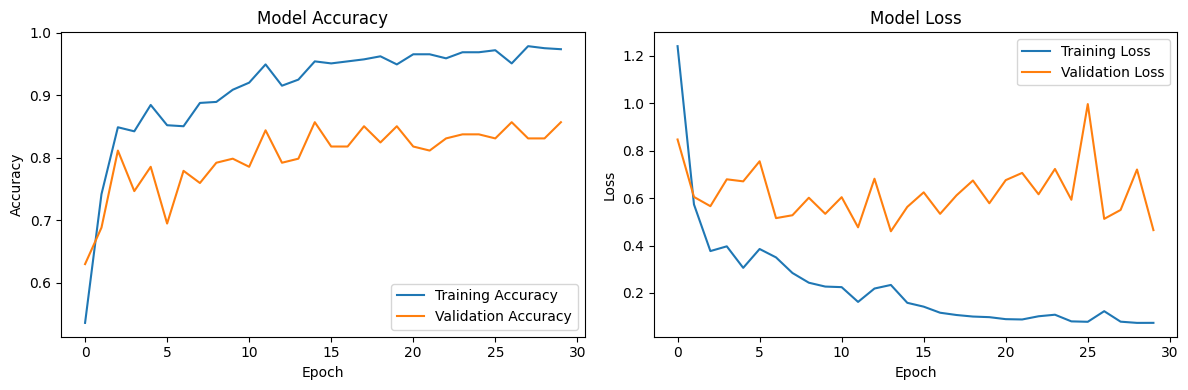

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')

# Plot the training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

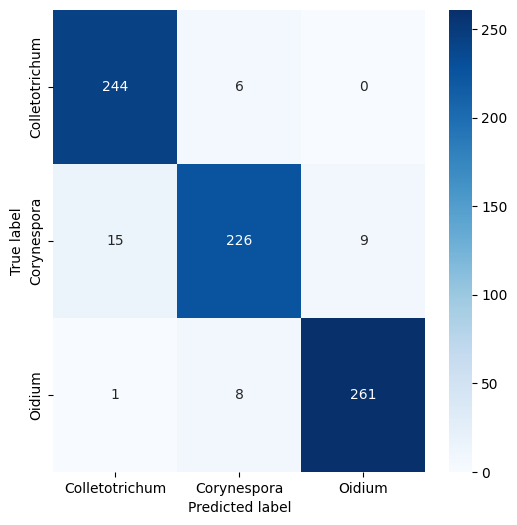

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true class indices
true_classes = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

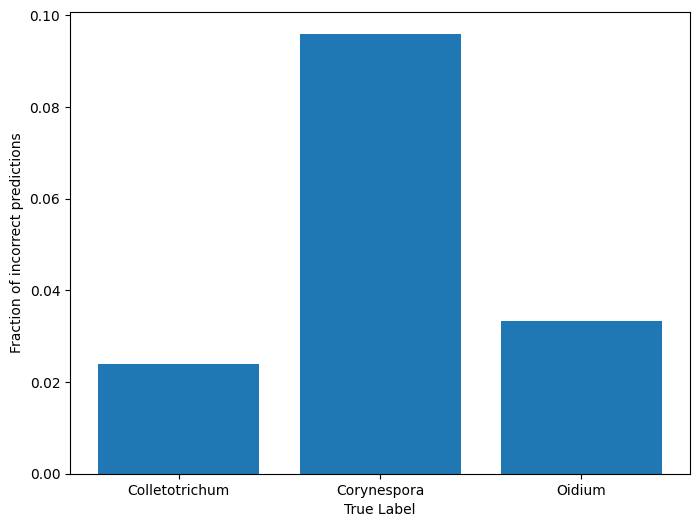

In [ ]:
# Calculate the fraction of incorrect predictions for each class
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

# Plot the fraction of incorrect predictions
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(np.arange(len(class_labels)), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(len(class_labels)), class_labels) 
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Dataset/Rubber_leaf_diseases_final.h5'
model = load_model(model_path)

In [ ]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO

# Read the image from the local file path
file_path = '/content/drive/MyDrive/Dataset/Rubber_Leaf/Colletotrichum/19.png'
#file_path = '/content/drive/MyDrive/Dataset/Jpg_Dataset/Colletotrichum/16.jpg'
image = cv2.imread(file_path)

# Resize the image
resized_image = cv2.resize(image, (224, 224))

# Convert the resized image to RGB format
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Expand dimensions and normalize the image
test_image = np.expand_dims(rgb_image, axis=0)
test_image = test_image / 255.0  # Normalize pixel values

# Predict using the model
predictions = model.predict(test_image)
print("Predicted values:", predictions)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())
print(class_labels)

print("Classification: ",class_labels[int(np.argmax(predictions,axis=1))])
print("Value", np.amax(predictions))


1/1 [==============================] - 0s 100ms/step
Predicted values: [[9.9980980e-01 1.2501293e-04 6.5240711e-05]]
['Colletotrichum', 'Corynespora', 'Oidium']
Classification:  Colletotrichum
Value 0.9998098
